In [1]:
from numpy import pi as PI
from scipy.spatial.distance import pdist

import numpy as np
import ringity as rng
import matplotlib.pyplot as plt

### Sample distribution

In [2]:
kapp = 1.234
lamb = 1/kapp
beta = 2/np.pi * np.arctan(1/lamb)

In [3]:
N = 2**13
positions = rng.get_positions(N, beta=beta)

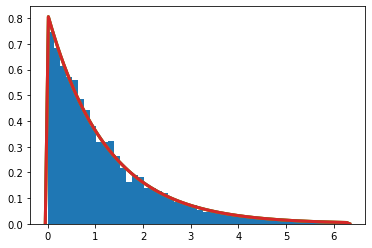

In [4]:
x = np.linspace(-0.05,2*np.pi+0.05,100)

plt.hist(positions, density=True, bins=50);

plt.plot(x, rng.pdf_delay(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_delay(x, beta, 'delay'), linewidth=3)

### Absolute distance

In [5]:
abs_dists = pdist(positions.reshape(-1,1))

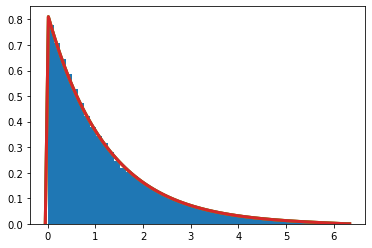

In [6]:
x = np.linspace(-0.05,2*np.pi+0.05,100)

plt.hist(abs_dists, density=True, bins=50);

plt.plot(x, rng.pdf_absolute_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, beta, 'delay'), linewidth=3)

### Circular distance

In [7]:
circ_dists = rng.geodesic_distances(positions)

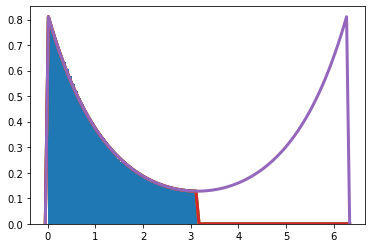

In [8]:
x = np.linspace(-0.05,2*np.pi+0.05,100)

plt.hist(circ_dists, density=True, bins=50);

plt.plot(x, rng.pdf_circular_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, beta, 'delay'), linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, lamb) + rng.pdf_absolute_distance(2*PI-x, lamb), linewidth=3)

### Similarity

In [11]:
a = 0.645

simis = rng.overlap(circ_dists,a)/(2*np.pi*a)

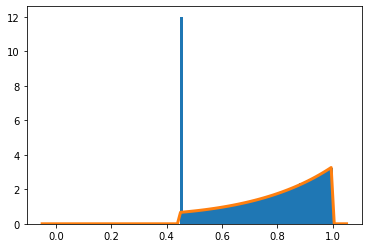

In [13]:
x = np.linspace(-0.05,1+0.05,100)

plt.hist(simis, density=True, bins=50);

plt.plot(x, rng.pdf_similarity(x, lamb, a) , linewidth=3)
#plt.plot(x, rng.pdf_circdist(x, kapp, 'shape'), linewidth=3)
#plt.plot(x, rng.pdf_circdist(x, beta, 'delay'), linewidth=3)
#plt.plot(x, rng.pdf_circular_distance(2*np.pi*a*(1-x), lamb)*2*np.pi*a, linewidth = 3)